In [4]:
#In this code file we run baseline ML models to get an understanding of the best perfoming models, which we will then use to perform hyperparameter tuning.
#Since we are dealing with a relatively small dataset of about 15,000 rows, scikit-learn models will be best suited, and we will not design a DNN.

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error
import joblib
from joblib import Parallel, delayed

In [66]:
def load_data(file_path):
    Dataset = pd.read_csv(file_path)
    return Dataset

In [67]:
def train_baseline_models(X_train, X_test, y_train, y_test):

    # Let's first define the baseline models we will be training
    models = {
        "RandomForest": RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1),
        "LinearRegression": LinearRegression(),
        "SVR": SVR(),
        "XGBoost": XGBRegressor(n_estimators=100, random_state=42, n_jobs=-1),
    }

    # Now let's train these baseline models and store the results
    model_results = {}
    trained_models = {}

    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        mae = mean_absolute_error(y_test, y_pred)

        # Storing results in model_result and models in trained_models dictionary
        model_results[name] = {'MAE': mae}
        trained_models[name] = model

    # Converting results to dataframe & sorting for the best model
    results_df = pd.DataFrame(model_results).T
    results_df = results_df.sort_values(by="MAE", ascending=True)

    return results_df, trained_models

In [68]:
def plotting_baseline_results(mae_results):
    plt.figure(figsize=(10, 6))
    mae_results["MAE"].plot(kind="bar", color="teal")
    plt.title("Model Performance (Baseline)")
    plt.ylabel("MAE Score")
    plt.xlabel("Models")
    plt.show()

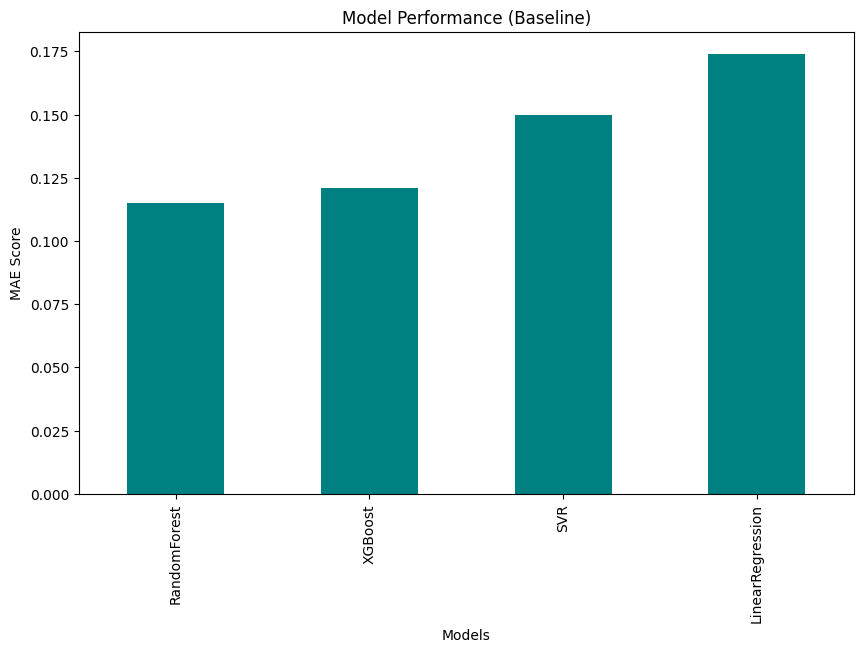

 best baseline model name: RandomForest, with an MAE of: 0.115
 best model has been saved to the 'Models' folder


In [69]:
if __name__ == '__main__':
    X_train_file_path = '../Data/X_train_dataset.csv'
    X_test_file_path = '../Data/X_test_dataset.csv'
    y_train_file_path = '../Data/y_train_dataset.csv'
    y_test_file_path = '../Data/y_test_dataset.csv'

    X_train = load_data(X_train_file_path)
    X_test = load_data(X_test_file_path)
    y_train = load_data(y_train_file_path).squeeze()
    y_test = load_data(y_test_file_path).squeeze()

    # Running function to train baseline ML models
    mae_results, trained_models = train_baseline_models(X_train, X_test, y_train, y_test)

    # Function to visualise results for best performing baseline ML model
    plotting_baseline_results(mae_results)

    # Function to save the best performing baseline model, which will be used to hyperparameter tune
    best_model_name = mae_results['MAE'].idxmin()
    best_model = trained_models[best_model_name]
    print(f" best baseline model name: {best_model_name}, with an MAE of: {round(mae_results['MAE'].min(), 3)}")
    joblib.dump(best_model, f"../Models/{best_model_name}_best.pkl")
    print(f" best model has been saved to the 'Models' folder")
    

    